# Group Project

*By Cecilia Liu, Alicia Cheng, and Eric Skrabak*

## Group Contributions Statement

Alicia and Eric worked on explanatory analysis and the discussion, respectively. Cecilia led the creation of modeling. All three students contributed to the project as a whole. 

# Data Acquisition

In this section, we import the required modules, and acquire and read the data into Python.

In [18]:
# Module imports
import pandas as pd
import numpy as np
import seaborn as sns 
import sklearn
from itertools import combinations 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import svm
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,accuracy_score,recall_score,precision_score

In [19]:
# Read in data
url = 'https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv'
penguins = pd.read_csv(url)
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


# Exploratory Analysis

## Data Cleaning

*First thing first, the data as imported was messy and had some incomplete rows. Our first step was to clean the data; we chose relevant columns from the data frame that we thought would be important for determining the species of a penguin, removed any rows that had missing information, and shortened the species names of the penguins.*

In [20]:
# Data cleaning
cols = ['Species','Island','Culmen Length (mm)','Culmen Depth (mm)',
        'Flipper Length (mm)','Body Mass (g)','Sex',
        'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
penguins = penguins[cols]
penguins = penguins.dropna()
penguins["Species"] = penguins["Species"].str.split().str.get(0)
penguins = penguins.loc[penguins['Sex']!='.']
penguins.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799


## Data Inspection

*Next, we generated tables and figures to inspect the relationship between variables. This meant creating **histograms** for the quantitative variables, **Culmen Length (mm), Culmen Depth (mm), Flipper Length (mm), Body Mass (g), and Delta 15 N (o/oo), Delta 13 C (o/oo)** and later **tables** for the qualitative variables, **Island and Sex**.*

In [21]:
def penguin_summary_table(group_cols, value_cols):
    '''
    This function generates a summary table of the penguins data set
    Parameter group_cols is how the penguins data set is grouped
    Parameter value_cols are the variables that are being summarized
    '''
    summary = penguins.groupby(group_cols)[value_cols].mean().round(2)
    return summary

penguin_summary_table(["Species"],
 ["Culmen Length (mm)", "Culmen Depth (mm)", 
  "Flipper Length (mm)", "Body Mass (g)", 
  "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"])

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Species,,,,,,
Adelie,38.79,18.32,190.32,3702.70,8.86,-25.81
Chinstrap,48.79,18.40,195.67,3729.85,9.36,-24.56
Gentoo,47.57,14.99,217.19,5091.10,8.25,-26.18


*From this table, we noticed **Culmen Length (mm), Culmen Depth (mm), Flipper Length (mm), and Body Mass (g)** each have a penguin species that are outlier-ish; noticeably longer, shorter, heavier, or lighter than the other penguins in the category. This lead us to believe that it would be these quantatative variables that would be best as predictor variables in our model.* 

<AxesSubplot:xlabel='Culmen Depth (mm)', ylabel='Count'>

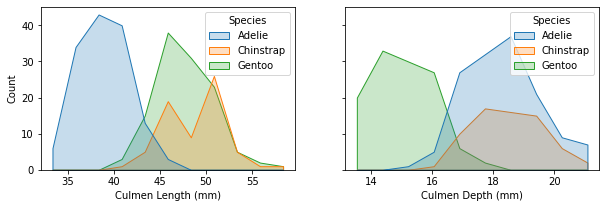

In [22]:
# Histograms to plot Culmen Lengths and Depths of each penguin species
fig, ax = plt.subplots(1,2, figsize=(10,3), sharey=True)
sns.histplot(data=penguins, x='Culmen Length (mm)', hue='Species', ax=ax[0], element='poly')
sns.histplot(data=penguins, x='Culmen Depth (mm)', hue='Species', ax=ax[1], element='poly')

*From the graphs, it is easy to see **Adelie** penguins have a noticably shorter average **Culmen Length (mm)**, and **Gentoo** penguins have a noticeably shorter average **Culmen Depth (mm)**. Each variable can be used to distinguish each penguin respectively, however, there is considerable overlap in the **Culmen Length (mm)** of **Chinstrap** and **Gentoo** penguins, and the **Culmen Depth (mm)** of **Chinstrap** and **Adelie** penguins. Individually, each variable may not be useful for predicting a penguin's species because of this overlap, but when used together...*

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

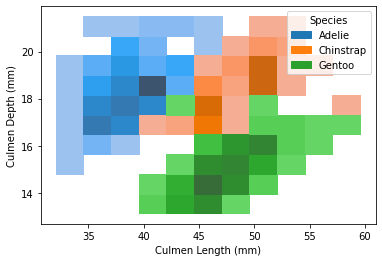

In [23]:
sns.histplot(data=penguins, x='Culmen Length (mm)', y='Culmen Depth (mm)', hue='Species')

*Although there is some overlap between the penguins, we can see that when graphing **Culmen Length (mm) vs Culmen Depth (mm)**, the graph forms more or less three distinct groups of penguins, confirming our thoughts that **Culmen Length (mm)** and **Culmen Depth (mm)** are good predictor variables to use.* 

<AxesSubplot:xlabel='Flipper Length (mm)', ylabel='Body Mass (g)'>

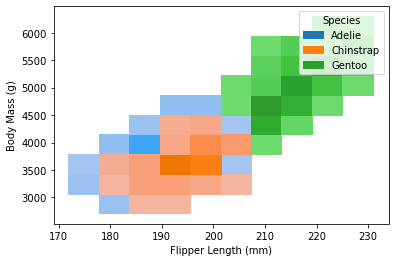

In [24]:
# Histogram for Flipper Length and Body Mass
sns.histplot(penguins, x="Flipper Length (mm)", y="Body Mass (g)", hue="Species")

*When graphing **Flipper Length (mm)** vs **Body mass (g)** we noticed that while there is considerable overlap in the mass and flipper length of **Adelie** and **Chinstrap penguins**, **Gentoo** penguins certainly distinguish themselves with both longer flippers and higher body mass. Perhaps **Gentoo** penguins are a larger species on average, though a height variable would be useful before reaching that conclusion. Regardless, **Flipper Length (mm)** and **Body mass (g)** could be useful in distinguishing **Gentoo** penguins from the other species.*

<AxesSubplot:xlabel='Delta 13 C (o/oo)', ylabel='Species'>

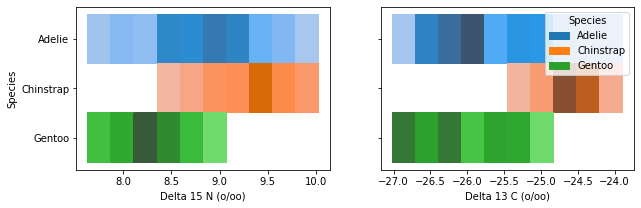

In [25]:
fig, ax = plt.subplots(1,2, figsize=(10,3), sharey=True)
sns.histplot(penguins, x="Delta 15 N (o/oo)", y="Species", hue="Species", ax=ax[0], legend=False)
sns.histplot(penguins, x="Delta 13 C (o/oo)", y="Species", hue="Species", ax=ax[1])

*From these graphs and the summary table, we saw **Chinstrap** penguins tended to have the highest concentration of **Delta 15 N (o/oo)** and **Delta 13 C (o/oo)**, while **Gentoo** had the lowest concentrations, on average. However, **Adelie** penguins have huge variation in their concentrations of **Delta 15 N (o/oo)** and **Delta 13 C (o/oo)**, from the lowest of Gentoo to the highest of Chinstrap. The overlap is so large that it may be difficult to distinguish the species using these two variables. Still, **Adelie**'s and **Gentoo**'s centers for **Delta 13 C (o/oo)** are more to the left, a contrast to the **Chinstrap**'s, whose center is to the right. The the centers for **Delta 15 N (o/oo)**, however, are more evenly spaced. So **Delta 13 C (o/oo)** may be a better predictor than **Delta 15 N (o/oo)**.*

How about categorical variables **Island** and **Sex**? We then put up **tables** to investigate the relationship between the two and penguin species. 

In [26]:
# Table for Sex
summary_sex = penguins.groupby(['Species','Sex']).size().reset_index(name='count')
summary_sex

,Species,Sex,count
0,Adelie,FEMALE,71
1,Adelie,MALE,68
2,Chinstrap,FEMALE,34
3,Chinstrap,MALE,33
4,Gentoo,FEMALE,58
5,Gentoo,MALE,60


*Overall, the distribution in the sex for each penguin is roughly equal, meaning **Sex** would be a poor choice of variable in distinguishing the species of each penguin.*

In [27]:
# Table for Island
summary_island = penguins.groupby(['Species','Island']).size().reset_index(name='count')
summary_island

,Species,Island,count
0,Adelie,Biscoe,44
1,Adelie,Dream,52
2,Adelie,Torgersen,43
3,Chinstrap,Dream,67
4,Gentoo,Biscoe,118


*On the other hand, **Island** can certainly be a useful predictor. **Chinstrap** and **Gentoo** penguins each appear only on one island, while **Adelie** appears on three. This could be extremely useful when considering the population of each species on each island. For example, if a penguin is from Togersen, it must be an **Adelie**, and if it is from Biscoe, it is more likely to be a **Gentoo**, considering **Adelie** and **Gentoo** are the only penguins on Biscoe, and the **Gentoo** population on that island is nearly three times that of the **Adelie**'s. A similar, but less convincing, conclusion could be reached for a penguin from Dream, when considering the close count of Adelie and Chinstrap penguins on Dream.*

## Data Preparation 

*To prepare for modeling, we recoded **Island** and **Species** into numerical values and split the data into train and test sets. As discussed above, we found **Sex** and **Delta 15 N (o/oo)** are poor choices for variables in distinguishing the species of a penguin, thus we decided not to include them in our models.*

In [40]:
# Create potential predictors and a target
X = penguins.drop(["Species","Sex","Delta 15 N (o/oo)"], axis=1)
Y = penguins["Species"]

# Recode Island in X
le1 = preprocessing.LabelEncoder()
X["Island"] = le1.fit_transform(X["Island"])

#Data Standardization #
C_len_scaler = StandardScaler()
C_dep_scaler = StandardScaler()
F_len_scaler = StandardScaler()
Body_scaler = StandardScaler()
Delta_scaler = StandardScaler()

#Calculate the mean and variance#
C_len_scaler.fit(pd.DataFrame(X['Culmen Length (mm)']))
C_dep_scaler.fit(pd.DataFrame(X['Culmen Depth (mm)']))
F_len_scaler.fit(pd.DataFrame(X['Flipper Length (mm)']))
Body_scaler.fit(pd.DataFrame(X['Body Mass (g)']))
Delta_scaler.fit(pd.DataFrame(X['Delta 13 C (o/oo)']))

#Standardized data#
X[['Culmen Length (mm)']] = C_len_scaler.transform(X[['Culmen Length (mm)']])
X[['Culmen Depth (mm)']] = C_dep_scaler.transform(X[['Culmen Depth (mm)']])
X[['Flipper Length (mm)']] = F_len_scaler.transform(X[['Flipper Length (mm)']])
X[['Body Mass (g)']] = Body_scaler.transform(X[['Body Mass (g)']])
X[['Delta 13 C(o/oo)']] = Delta_scaler.transform(X[['Delta 13 C (o/oo)']])


# Recode Species in y
le2 = preprocessing.LabelEncoder()
Y = le2.fit_transform(Y)

# Modeling

*In this section, we used three machine learning models: **Multinomial Logistic Regression**, a **Decision Tree**, and a **Support Vector Machine**. Besides the fact they were required, we chose multinomial logistic regression and a descison tree as two of our models because of their ease of use and ability to model multiple outcomes. We chose a support vector machine because its use in classification problems, such as classifying penguins.*

## Strategy
*We had a simple strategy to find the optimal predictor variables for predicting the species of a penguin:*

    1.Find the best hyperparameters in three models.
        Multinomial Logistic Regression: Parameter C, Support vector: Parameter C, Decision tree: Parameter max_depth
       
    2.Apply the best hyperparameters to the models and find the best predictor variables.

## Model Explanation
**Multinomial Logistic Regression**
    - An extension of the most common algorithm model, logistic regression, which is able to predict the probabilities of more         than two discrete outcomes. Similarily to linear regression, logistic regression makes a prediction by taking the weighted       average of input features and output a categorical prediction. Unlike linear regression, however, logistic regression fits       seen, training data to a S-shaped logistic function.  
    
**Decision tree Model**
    - A decison tree, as the name implies, uses a tree-like structure to classify data by separating seen, training data based         on specified predictor variables. Each 'leaf' of the tree represents a different predictor variable, with the top leaf, or       root, being the most important predictor. 
    
**Support Vector Model**
    - Plots data in n-dimensional space and finds a 'hyperplane' that classifies and seperates the data. The ideal hyperplane         has the largest distance between the hyperplane and the closest point in the data.  

## Find the best hyperparameter by using cross-vaildation
   

In [41]:
#Find the best C parameter for Logistic and SVM model#

"""
Hyperparameter C : float, default=1.0
Inverse of regularization strength;  
In support vector machines, smaller values specify stronger regularization.
In regularization, we retain the features of the function, 
but reduce the order of magnitude of the feature variables
"""

TestX = X[['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)']].values #test the cols 
TestY = Y

X_train,X_test,Y_train,Y_test = train_test_split(TestX,TestY,test_size = 0.20)

def select_c_function(x,y,a):
    """
    This function is to measure the score of each model.
    Choose the accruacy as the score.
    The parameter x,y: test data
    The parameter a:the estimator of model
    Return the score of the model after cross-vaildation
    """
    # Perform 10-fold cross-validation on the model. 
    # Since f1 cannot be applied to multi-class, the accuracy of scoring is selected
    ac_score = cross_val_score(a, x, y, scoring='accuracy', cv=10)
    return ac_score.mean() # Calculate the mean of 10-fold cross-validation's scores

In [42]:
C = [0.1,1,10,100,1000,10000]
lr_result = []
svm_result = []
for i in C:
    #Create the classifier of Logistic Regression Model
    #multi_class='ovr' should be used in  multinomial logistic regression
    lr_classifier = LogisticRegression(C=i,multi_class='ovr', solver='sag')
    #Create the classifier of Support vector Model
    svm_classifier = svm.SVC(C=i, kernel='rbf', decision_function_shape='ovr', gamma=0.01)
    
    lr_avg_score = select_c_function(X_train,Y_train,lr_classifier)
    svm_avg_score = select_c_function(X_train,Y_train,svm_classifier)
    
    lr_result.append(lr_avg_score)
    svm_result.append(svm_avg_score)
    

C:\Users\Eric Skrabak\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Eric Skrabak\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Eric Skrabak\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Eric Skrabak\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Eric Skrabak\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: 

C:\Users\Eric Skrabak\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Eric Skrabak\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [43]:
#Display the results of different value of C parameter and find the best one#

#Logistic Regression Model
print("\t\t\tLogistic Regression Model\t\t")
for i in range(len(C)):
    print('When C parameter is {}，the score of model is {}'.format(C[i], lr_result[i]))

print('')
#Support Vector Model
print("\t\t\tSupport Vector Model\t\t")
for i in range(len(C)):
    print('When C parameter is {}，the score of model is {}'.format(C[i], svm_result[i]))

print('')

			Logistic Regression Model		
When C parameter is 0.1，the score of model is 0.9344615384615385
When C parameter is 1，the score of model is 0.9538461538461538
When C parameter is 10，the score of model is 0.9653846153846153
When C parameter is 100，the score of model is 0.9730769230769232
When C parameter is 1000，the score of model is 0.9730769230769232
When C parameter is 10000，the score of model is 0.9730769230769232

			Support Vector Model		
When C parameter is 0.1，the score of model is 0.6101538461538462
When C parameter is 1，the score of model is 0.9652307692307694
When C parameter is 10，the score of model is 0.9767692307692307
When C parameter is 100，the score of model is 0.9807692307692308
When C parameter is 1000，the score of model is 0.9961538461538462
When C parameter is 10000，the score of model is 0.9961538461538462



*We tried to change testX into different combination of predictors and observed the best C. We found that when C = 1, both the Multinomial Logistic Regression model and Support Vector Machine model performed the best.*

[Text(0.5, 1.0, 'Best Depth')]

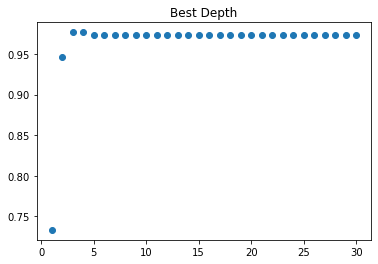

In [65]:
#Find the best-depth of tree model#

"""

Hpyerparameter Max_depth:
that governs how many layers of decisions the tree is allowed to make. 
Larger max_depth values correspond to more complicated trees. 
In this way, max_depth is a model complexity parameter, 
similar to the degree when we did polynomial regression.

"""
tree_classifier = DecisionTreeClassifier()
best_score=-np.inf
N=30 #largest max depth
scores=np.zeros(N)
#to find the best depth
for d in range(1,N+1):
    T=DecisionTreeClassifier(max_depth=d)
    #score the trees of each depth
    scores[d-1]=cross_val_score(T,X_train,Y_train,cv=5).mean()
    #if the new score is better than the previous ones, record the new best score and depth
    if scores[d-1]>best_score:
        best_depth=d
        best_score=scores[d-1]

fig,ax=plt.subplots(1)
ax.scatter(np.arange(1,N+1),scores)
ax.set(title="Best Depth")

*As shown in the graph above, a tree with a depth of 3 performed the best, meaning we had to find the best 3 combination of predictor variables to use in our models.*

## Find the 3 best predictors

In [70]:
#find the all combinations of the cols
col = combinations(['Island','Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)', 'Delta 13 C (o/oo)'],3)
a = list(col)
s = []

for item in a:
    s.append(list(item))

In [58]:

def bestval_search(X,Y,val_group,modeltype):
    """
    This function is to find the best combination under each model.
    X,Y: the input train data 
    val_group: All the combinations of columns
    model type: the type of the model we selected
    """
    best_val = None
    best_score = 0.0
    classifier = None
    for item in s: #for each combination of predictor variables
        val_group = "'{}','{}','{}'".format(item[0],item[1],item[2])
        penguins_data_X = X_train[item].values #get the data with each combination
        penguins_data_Y = Y_train
        
        if modeltype == 'Support Vector':
            Classifier = svm.SVC(C=1.0, kernel='rbf', decision_function_shape='ovr', gamma=0.01)
        elif modeltype == 'Logistic':
            Classifier = LogisticRegression(multi_class='ovr', solver='sag',C = 1)
        elif modeltype == 'Decision Tree':
             Classifier = DecisionTreeClassifier(max_depth = 3)
        else:
            break
        #fit and score the data
        Classifier.fit(penguins_data_X, penguins_data_Y)
        ac_score = cross_val_score( Classifier,penguins_data_X, penguins_data_Y,cv=10).mean()
        if ac_score > best_score: #if the new score is an improvement, update best score and val
            best_score = ac_score
            best_val = val_group
            classifier =  Classifier
        return list(eval(best_val)),best_score,classifier


In [62]:
def bestval_test(best_val,X,Y,classifier):
    """
    This function is to score the model by test data.
    Best_val:   the combination of columns that performs best in training process
    X,Y:        Test data
    Classifier: Classifier of models
    """
    X_test = X[best_val].values
    Y_test = Y

    Y_pred = classifier.predict(X_test) 
    best_pre_score = accuracy_score(Y_test,Y_pred)
    
    return best_pre_score


In [63]:
#Output the result
models = ['Support Vector','Logistic','Decision Tree']
results = {}
for model in models:
    best_val,best_score,classifier = bestval_search(X_train,Y_train,s,model)
    best_pre_score = bestval_test(best_val,X_test,Y_test,classifier)
    results[model] = (best_val,best_score,best_pre_score)

<ipython-input-58-66ce6dd7ff3f>:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  penguins_data_X = X_train[item].values


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [64]:
#Display the result
for key in results:
    print("Model：{}\nbest_combination：{}\ntraining score：{}\ntesting score：{}".format(key,results[key][0],results[key][1],results[key][2]))
    print('')

# Discussion

Reflect on your findings, as outlined in the project description.

*Overall, all of our models performed very well, all above 96%, which would suggest the predictor variables we used were good choices. If we were to reccomend a model, we would choose **Multinomial Logistic Regression** model with the predictor variables **Island**, **Culmen Length (mm)**, and **Culmen Depth**. We would choose the MLR model because the other models seemed to have slightly overfit. Considering the predictor variables we chose, our models likely had issues with **Chinstrap** penguins. As shown in the **Culmen Length (mm)** vs **Culmen Depth (mm)** graph, **Chinstrap** penguins fall in between **Adelie** and **Gentoo** for these variables, meaning an outlier **Chinstrap** could be mistaken as one of the other species or vice versa. When also considering the fact we used the **Island** predictor variable, and that only **Adelie** penguins appear on an island with another penguin, our models likely had confusion with **Adelie** and **Chinstrap** penguins. With more data, perhaps we would be able to better train our models to avoid the problem of overfitting and avoid the mistakes the models made. Using an imperfect model, with even just one mistake, could result in the disastorous death of an innocent penguin life. As Darwin noted centuries ago, the birds of the Galapagos Islands each adapted to life on their specfic islands, with different sizes, shapes, and beaks. Similarily, **Gentoo** and **Chinstrap** penguins are highly specialized for life on their specific islands, as shown in the noticeable difference in culmens and masses. If these models were used to seperate a large batch of penguins onto their suitable islands, a **Chinstrap** or **Gentoo** dropped in the wrong place could cause their death as they are not adapted to life on other islands. **Adelies** would likely be okay, thankfully, as they can be found on all three islands.*